In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [6]:
#importing sample data
df_sample = pd.read_csv('/Users/pavankalyankarri/Desktop/Guvi/Project 3/sample_submission.csv',index_col = 0)
df_sample.head()

,Premium Amount
id,
1200000,1102.545
1200001,1102.545
1200002,1102.545
1200003,1102.545
1200004,1102.545


In [8]:
#importing test data
df_test = pd.read_csv('/Users/pavankalyankarri/Desktop/Guvi/Project 3/test.csv',index_col = 0)
df_test.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
id,,,,,,,,,,,,,,,,,,,
1200000,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,NaN,19.0,NaN,1.0,2023-06-04 15:21:39.245086,Poor,Yes,Weekly,House
1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,NaN,14.0,372.0,8.0,2024-04-22 15:21:39.224915,Good,Yes,Rarely,Apartment
1200002,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,NaN,16.0,819.0,9.0,2023-04-05 15:21:39.134960,Average,Yes,Monthly,Condo
1200003,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.0,3.0,770.0,5.0,2023-10-25 15:21:39.134960,Poor,Yes,Daily,House
1200004,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,NaN,14.0,755.0,7.0,2021-11-26 15:21:39.259788,Average,No,Weekly,House


In [10]:
#importing train data
df_train = pd.read_csv('/Users/pavankalyankarri/Desktop/Guvi/Project 3/train.csv',index_col = 0)
df_train.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
id,,,,,,,,,,,,,,,,,,,,
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [12]:
# Shape and columns
print('Train shape:', df_train.shape)
print('Test shape:', df_test.shape)
print('Train columns:', df_train.columns)
print('Test columns:', df_test.columns)



Train shape: (1200000, 20)
Test shape: (800000, 19)
Train columns: Index(['Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount'],
      dtype='object')
Test columns: Index(['Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type'],
      dtype='object')


In [14]:

# Shape and columns
print('Train shape:', df_train.shape)
print('Train columns:', df_train.columns)

# Data information and missing values
print(df_train.info())
print("Missing values per column:")
print(df_train.isnull().sum())

# Basic stats for numerical columns
print("\nNumerical features statistics:")
print(df_train.describe())

# Summary of categorical columns
print("\nCategorical features statistics:")
print(df_train.select_dtypes(include='object').describe())


Train shape: (1200000, 20)
Train columns: Index(['Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 1200000 entries, 0 to 1199999
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Age                   1181295 non-null  float64
 1   Gender                1200000 non-null  object 
 2   Annual Income         1155051 non-null  float64
 3   Marital Status        1181471 non-null  object 
 4   Number of Dependents  1090328 non-null  float64
 5   Education Level       1200000 non-null  object 
 6   Occupation     

In [16]:
# Quick look at data types and NA values
print(df_train.info())
print(df_train.isnull().sum())  # Missing values per column

# Basic stats for numerical columns
print(df_train.describe())

# For categorical columns
print(df_train.select_dtypes(include='object').describe())


<class 'pandas.core.frame.DataFrame'>
Index: 1200000 entries, 0 to 1199999
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Age                   1181295 non-null  float64
 1   Gender                1200000 non-null  object 
 2   Annual Income         1155051 non-null  float64
 3   Marital Status        1181471 non-null  object 
 4   Number of Dependents  1090328 non-null  float64
 5   Education Level       1200000 non-null  object 
 6   Occupation            841925 non-null   object 
 7   Health Score          1125924 non-null  float64
 8   Location              1200000 non-null  object 
 9   Policy Type           1200000 non-null  object 
 10  Previous Claims       835971 non-null   float64
 11  Vehicle Age           1199994 non-null  float64
 12  Credit Score          1062118 non-null  float64
 13  Insurance Duration    1199999 non-null  float64
 14  Policy Start Date     1200000 non-null 

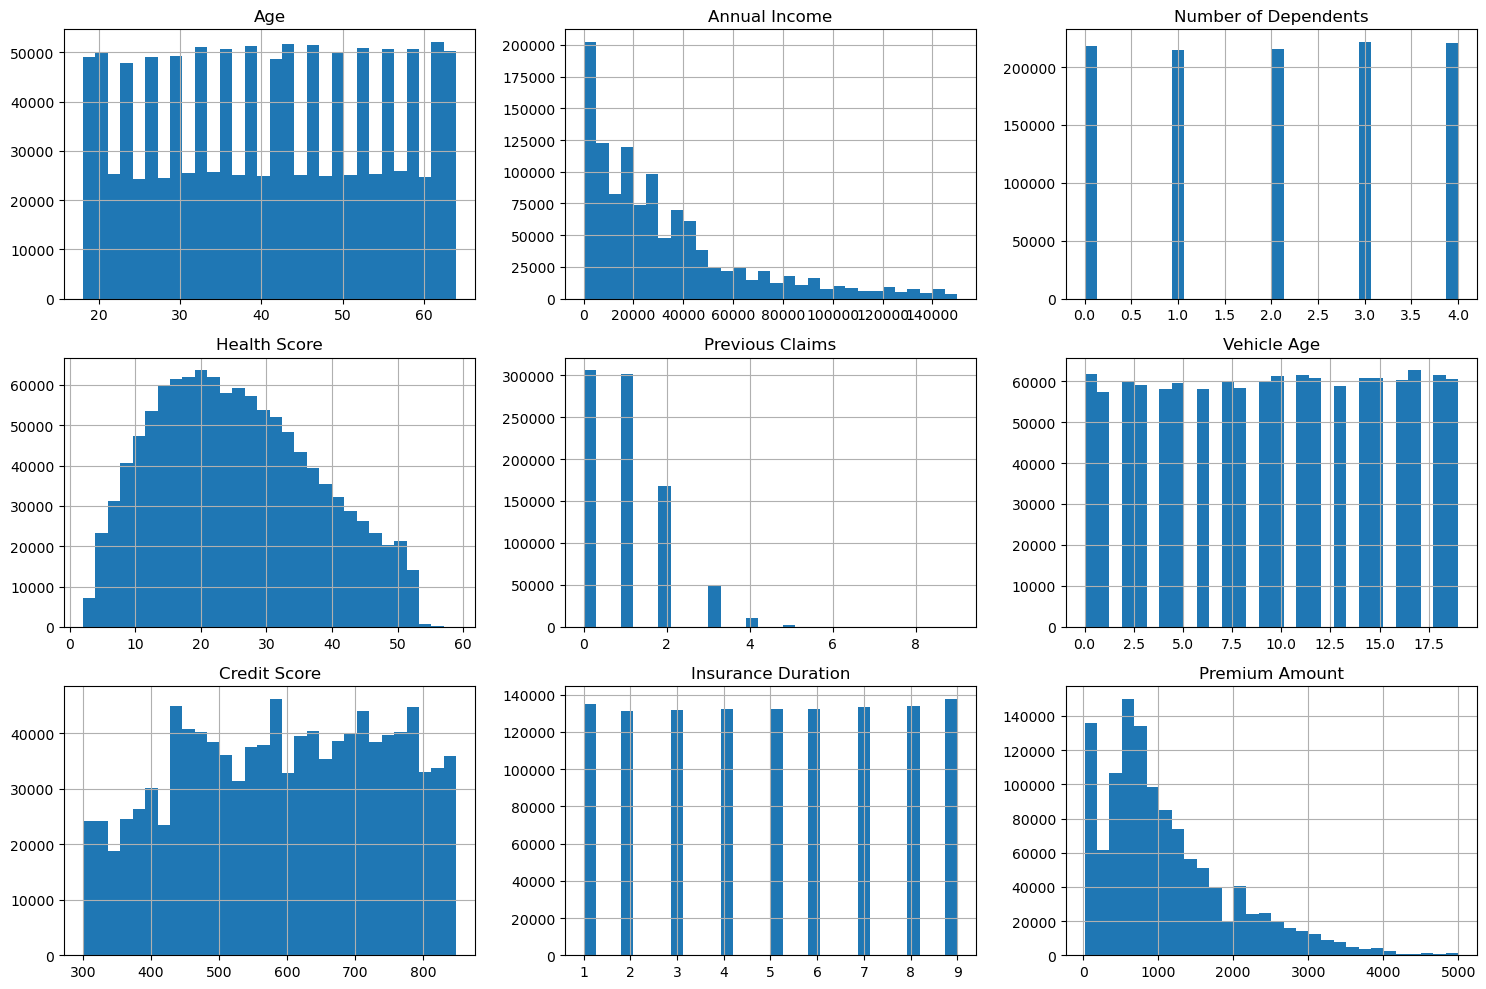

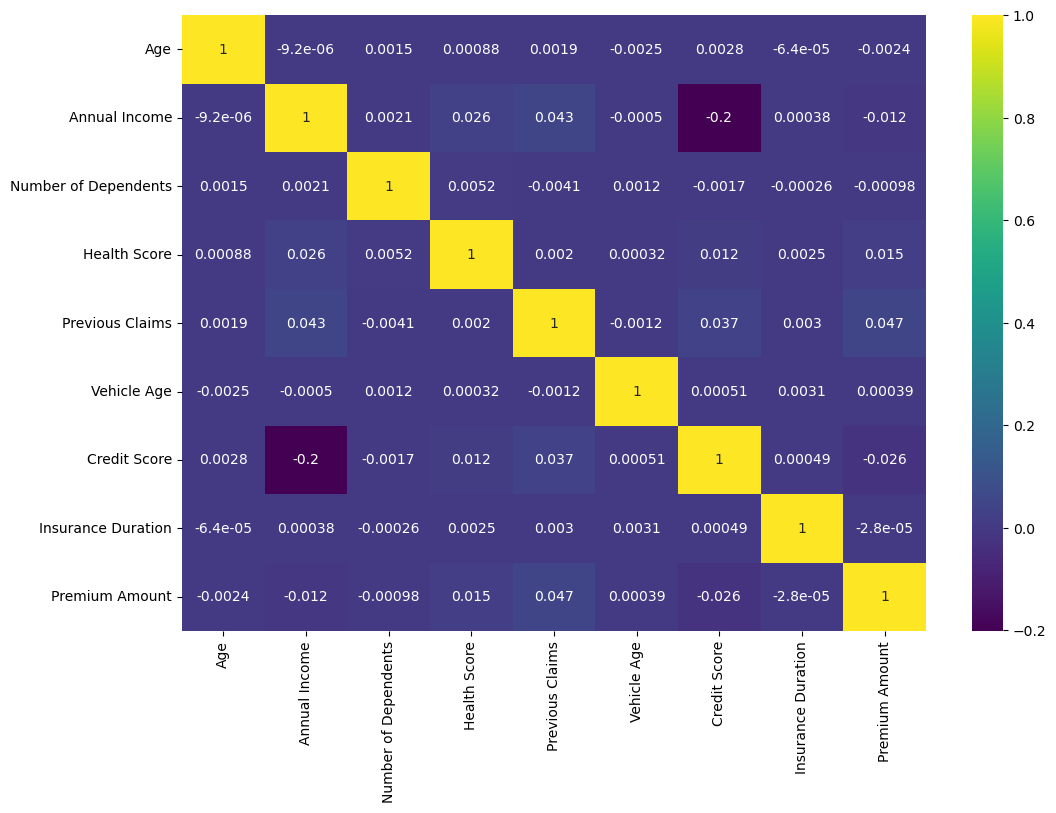

In [18]:
# Histograms of numerical features
df_train.hist(figsize=(15,10), bins=30)
plt.tight_layout()
plt.show()

# Correlation heatmap (helps spot relationships with target)
plt.figure(figsize=(12,8))
num_cols = df_train.select_dtypes(include=[np.number])
sns.heatmap(num_cols.corr(), annot=True, cmap='viridis')
plt.show()


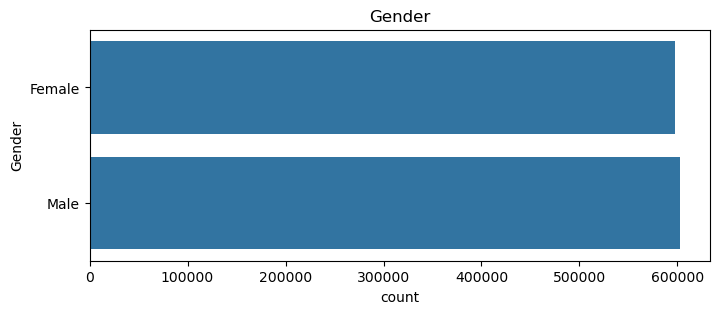

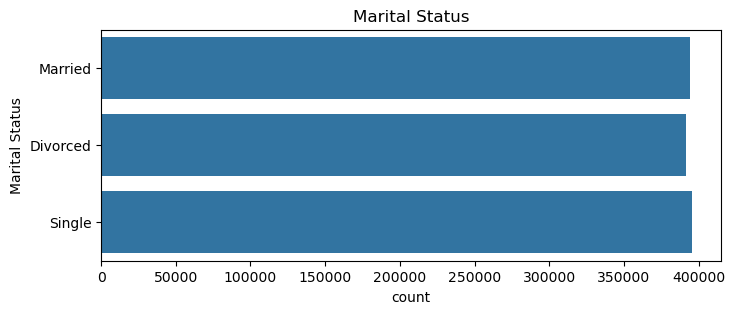

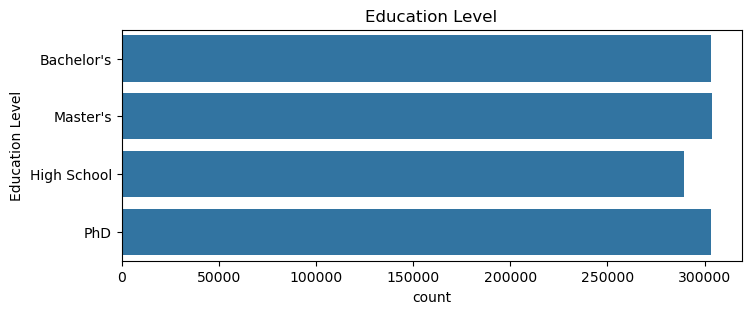

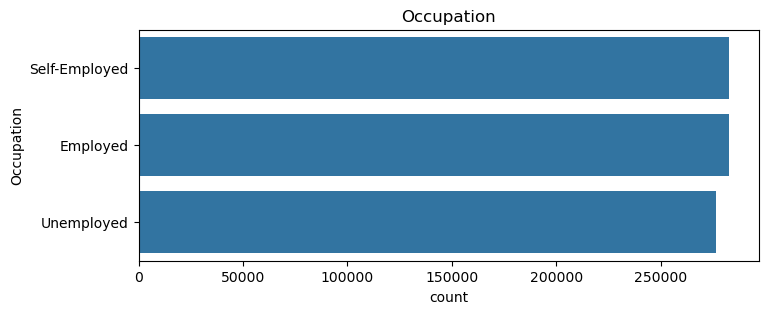

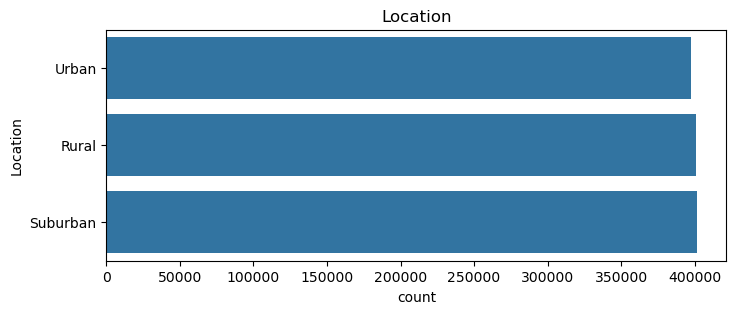

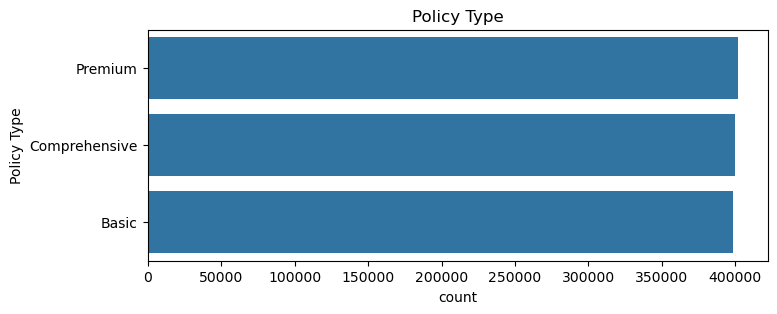

KeyboardInterrupt: 

In [19]:
categoricals = df_train.select_dtypes(include='object').columns
for col in categoricals:
    plt.figure(figsize=(8,3))
    sns.countplot(y=col, data=df_train)
    plt.title(col)
    plt.show()


In [20]:
# Separate numerical and categorical columns first
num_cols = df_train.select_dtypes(include=np.number).columns.tolist()
cat_cols = df_train.select_dtypes(include='object').columns.tolist()

print("Numerical columns:", num_cols)
print("Categorical columns:", cat_cols)

# Import SimpleImputer for more robust imputation
from sklearn.impute import SimpleImputer

# Impute numerical columns with median
num_imputer = SimpleImputer(strategy='median')
df_train[num_cols] = num_imputer.fit_transform(df_train[num_cols])

# Impute categorical columns with most frequent (mode)
cat_imputer = SimpleImputer(strategy='most_frequent')
df_train[cat_cols] = cat_imputer.fit_transform(df_train[cat_cols])


Numerical columns: ['Age', 'Annual Income', 'Number of Dependents', 'Health Score', 'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Premium Amount']
Categorical columns: ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Policy Start Date', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type']


In [ ]:
# One-hot encode categorical features
df_train_encoded = pd.get_dummies(df_train, columns=cat_cols, drop_first=True)

print("New shape after encoding:", df_train_encoded.shape)
